In [1]:
import numpy as np #scientific computing
import pandas as pd #data management
import itertools

#matplotlib for plotting
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.ticker as mtick #for percentage ticks

#sklearn for modeling
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier #Decision Tree algorithm
from sklearn.model_selection import train_test_split #Data split function
from sklearn.preprocessing import LabelEncoder #OneHotEncoding
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

#Decision tree plot
import pydotplus
from IPython.display import Image


#matplotlib for plotting

import scikitplot as skplt 

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split #Data split function
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA


from collections import Counter

Using TensorFlow backend.


In [2]:
data = pd.read_csv('Data2.csv')
pd.set_option('display.max_columns', 999)
data.head()

,OBS,NAME,IMDB,VIEWS,REVENUE,PREMIERE,P_YEAR,D_GENDER,CO_COUNTRY,GENRE,LENGTH,BUDGET,TOTAL_SUPPORT,PRODUCTION_SUPPORT,DISTRIBUTION_SUPPORT,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,1,Tuntematon sotilas,tt4065552,1023391.0,14188838.11,27/10/2017,2017,m,FI,"Drama, War",180,6500000.0,980000.0,940000.0,119300.0,NaN,NaN,NaN,NaN,NaN
1,2,Pahat pojat,tt0323551,614799.0,4413675.00,17/01/2003,2003,m,FI,"Action, Biography, Crime, Drama",126,1439312.0,700000.0,700000.0,70000.0,NaN,NaN,NaN,NaN,NaN
2,3,Luokkakokous,tt3672640,505432.0,5026197.18,25/02/2015,2015,m,FI,Comedy,88,1390300.0,695115.0,695115.0,100000.0,NaN,NaN,NaN,NaN,NaN
3,4,Mielensäpahoittaja,tt2480454,500934.0,4686353.73,05/09/2014,2014,m,FI,"Comedy, Drama",102,1585428.0,769468.0,769468.0,80900.0,NaN,NaN,NaN,NaN,NaN
4,5,Matti,tt0390245,461665.0,3620390.50,13/01/2006,2006,m,FI,"Biography, Comedy, Drama, Sport",135,1726550.0,708500.0,700000.0,70000.0,NaN,NaN,NaN,NaN,NaN


In [3]:
data.describe().round()

,OBS,VIEWS,REVENUE,P_YEAR,LENGTH,BUDGET,TOTAL_SUPPORT,PRODUCTION_SUPPORT,DISTRIBUTION_SUPPORT,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
count,404.0,404.0,404.0,404.0,404.0,404.0,404.0,404.0,404.0,0.0,0.0,0.0,0.0,0.0
mean,202.0,71544.0,646877.0,2012.0,93.0,1097109.0,443445.0,416026.0,59741.0,NaN,NaN,NaN,NaN,NaN
std,117.0,106230.0,1091799.0,5.0,18.0,1066304.0,291897.0,281129.0,34256.0,NaN,NaN,NaN,NaN,NaN
min,1.0,183.0,885.0,2001.0,0.0,6700.0,7805.0,7805.0,530.0,NaN,NaN,NaN,NaN,NaN
25%,102.0,3810.0,30077.0,2008.0,82.0,323915.0,134800.0,120000.0,27369.0,NaN,NaN,NaN,NaN,NaN
50%,202.0,26510.0,235923.0,2013.0,92.0,1055700.0,522725.0,500000.0,68007.0,NaN,NaN,NaN,NaN,NaN
75%,303.0,101694.0,878191.0,2016.0,104.0,1494750.0,708500.0,684254.0,88000.0,NaN,NaN,NaN,NaN,NaN
max,404.0,1023391.0,14188838.0,2020.0,180.0,10987730.0,1000000.0,940000.0,120000.0,NaN,NaN,NaN,NaN,NaN


In [4]:
data.drop(['IMDB', 'OBS', 'VIEWS', 'P_YEAR', 'D_GENDER'] , axis=1, inplace=True)
data = data.drop(data.columns[10:], axis=1)

In [5]:
data['NAME_LENGTH']= data["NAME"].apply(len)
data.drop('NAME', axis=1, inplace=True)

In [6]:
data["PREMIERE"]=data['PREMIERE'].str[3:5]
data["PREMIERE"]=data['PREMIERE'].astype(int)

In [7]:
#Data2 only code
cleanup_nums = {"CO_COUNTRY": {"FI": 0}}
data.replace(cleanup_nums, inplace=True)
data.CO_COUNTRY = data.CO_COUNTRY.apply(lambda x: 1 if x != 0 else 0)

In [8]:
data = data[data['LENGTH']>0]

length60 = data['LENGTH'].between(0,60)
length90 = data['LENGTH'].between(60,90)
length120 = data['LENGTH'].between(90,120)
length180 = data['LENGTH'].between(120,180)
data['LENGTH60'] = length60
data['LENGTH90'] = length90
data['LENGTH120'] = length120
data['LENGTH180'] = length180

data.drop('LENGTH', axis=1, inplace=True)

In [9]:
data.head()

,REVENUE,PREMIERE,CO_COUNTRY,GENRE,BUDGET,TOTAL_SUPPORT,PRODUCTION_SUPPORT,DISTRIBUTION_SUPPORT,NAME_LENGTH,LENGTH60,LENGTH90,LENGTH120,LENGTH180
0,14188838.11,10,0,"Drama, War",6500000.0,980000.0,940000.0,119300.0,18,False,False,False,True
1,4413675.00,1,0,"Action, Biography, Crime, Drama",1439312.0,700000.0,700000.0,70000.0,11,False,False,False,True
2,5026197.18,2,0,Comedy,1390300.0,695115.0,695115.0,100000.0,12,False,True,False,False
3,4686353.73,9,0,"Comedy, Drama",1585428.0,769468.0,769468.0,80900.0,18,False,False,True,False
4,3620390.50,1,0,"Biography, Comedy, Drama, Sport",1726550.0,708500.0,700000.0,70000.0,5,False,False,False,True


In [10]:
# Profitable
profitable = data['REVENUE'] > data['BUDGET']
data['PROFIT'] = profitable
data.drop('REVENUE', axis=1, inplace=True)
data.head()

,PREMIERE,CO_COUNTRY,GENRE,BUDGET,TOTAL_SUPPORT,PRODUCTION_SUPPORT,DISTRIBUTION_SUPPORT,NAME_LENGTH,LENGTH60,LENGTH90,LENGTH120,LENGTH180,PROFIT
0,10,0,"Drama, War",6500000.0,980000.0,940000.0,119300.0,18,False,False,False,True,True
1,1,0,"Action, Biography, Crime, Drama",1439312.0,700000.0,700000.0,70000.0,11,False,False,False,True,True
2,2,0,Comedy,1390300.0,695115.0,695115.0,100000.0,12,False,True,False,False,True
3,9,0,"Comedy, Drama",1585428.0,769468.0,769468.0,80900.0,18,False,False,True,False,True
4,1,0,"Biography, Comedy, Drama, Sport",1726550.0,708500.0,700000.0,70000.0,5,False,False,False,True,True


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401 entries, 0 to 403
Data columns (total 13 columns):
PREMIERE                401 non-null int64
CO_COUNTRY              401 non-null int64
GENRE                   401 non-null object
BUDGET                  401 non-null float64
TOTAL_SUPPORT           401 non-null float64
PRODUCTION_SUPPORT      401 non-null float64
DISTRIBUTION_SUPPORT    401 non-null float64
NAME_LENGTH             401 non-null int64
LENGTH60                401 non-null bool
LENGTH90                401 non-null bool
LENGTH120               401 non-null bool
LENGTH180               401 non-null bool
PROFIT                  401 non-null bool
dtypes: bool(5), float64(4), int64(3), object(1)
memory usage: 30.2+ KB


In [12]:
data.describe().round()

,PREMIERE,CO_COUNTRY,BUDGET,TOTAL_SUPPORT,PRODUCTION_SUPPORT,DISTRIBUTION_SUPPORT,NAME_LENGTH
count,401.0,401.0,401.0,401.0,401.0,401.0,401.0
mean,7.0,0.0,1093200.0,441928.0,414378.0,59422.0,16.0
std,4.0,0.0,1069300.0,292448.0,281507.0,34172.0,8.0
min,1.0,0.0,6700.0,7805.0,7805.0,530.0,2.0
25%,3.0,0.0,318897.0,134200.0,120000.0,27149.0,10.0
50%,8.0,0.0,1050573.0,520000.0,500000.0,67000.0,15.0
75%,10.0,0.0,1480000.0,708500.0,685000.0,87800.0,21.0
max,12.0,1.0,10987730.0,1000000.0,940000.0,120000.0,46.0


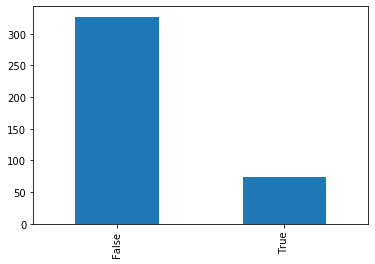

In [13]:
ax = data['PROFIT'].value_counts().plot(kind='bar')

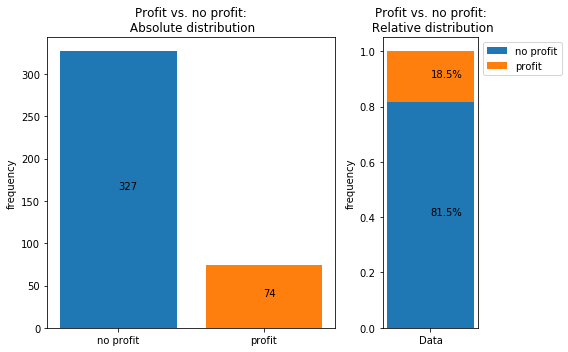

In [14]:
keys, counts = np.unique(data.PROFIT, return_counts=True)
counts_norm = counts/counts.sum()

fig = plt.figure(figsize=(8, 5)) #specify figure size
gs = gridspec.GridSpec(1, 2, width_ratios=[3,1]) #specify relative size of left and right plot

#Absolute values
ax0 = plt.subplot(gs[0])
ax0 = plt.bar(['no profit', 'profit'], counts, color=['#1f77b4','#ff7f0e']) #left bar plot
ax0 = plt.title('Profit vs. no profit:\n Absolute distribution') 
ax0 = plt.ylabel('frequency')
ax0 = plt.text(['no profit'], counts[0]/2, counts[0])
ax0 = plt.text(['profit'], counts[1]/2, counts[1]) 

#Normalized values
ax1 = plt.subplot(gs[1])
ax1 = plt.bar(['Data'], [counts_norm[0]], label='no profit')
ax1 = plt.bar(['Data'], [counts_norm[1]], bottom=counts_norm[0], label='profit')
ax1 = plt.legend(bbox_to_anchor=(1, 1))
ax1 = plt.title('Profit vs. no profit:\n Relative distribution')
ax1 = plt.ylabel('frequency')
ax1 = plt.text(['Data'],counts_norm[0]/2, '{}%'.format((counts_norm[0]*100).round(1)))
ax1 = plt.text(['Data'],(counts_norm[1]/2)+counts_norm[0], '{}%'.format((counts_norm[1]*100).round(1)))

plt.tight_layout()
plt.show()

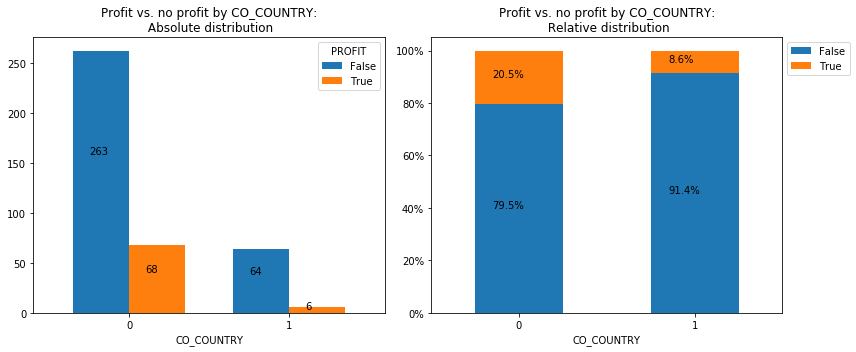

In [15]:
fig = plt.figure(figsize=(12, 5)) #specify figure size

#Absolute distribution
plt.subplot(1, 2, 1)
ax1 = data.groupby(['CO_COUNTRY', 'PROFIT'])['PROFIT'].count().unstack().plot.bar(rot=0, ax=plt.gca(), width=0.7)
plt.title('Profit vs. no profit by CO_COUNTRY:\n Absolute distribution') 
#plot bar labels
for p in ax1.patches:
    ax1.annotate(str(p.get_height()), (p.get_x() +0.1, p.get_height() * 0.605))

#Relative distribution
plt.subplot(1, 2, 2)
ax2 = data.groupby(['CO_COUNTRY', 'PROFIT'])['PROFIT'].size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True, rot=0, ax=plt.gca())
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Profit vs. no profit by CO_COUNTRY:\n Relative distribution') 
#plot bar labels
for p, q in zip(ax2.patches[0:2], ax2.patches[2:4]):
    ax2.annotate(str(round(p.get_height(),1)) + '%', (p.get_x()+0.1, p.get_height()/2))
    ax2.annotate(str(round(q.get_height(),1)) + '%', (q.get_x()+0.1, q.get_height()/2+p.get_height()))

plt.tight_layout()
plt.show()

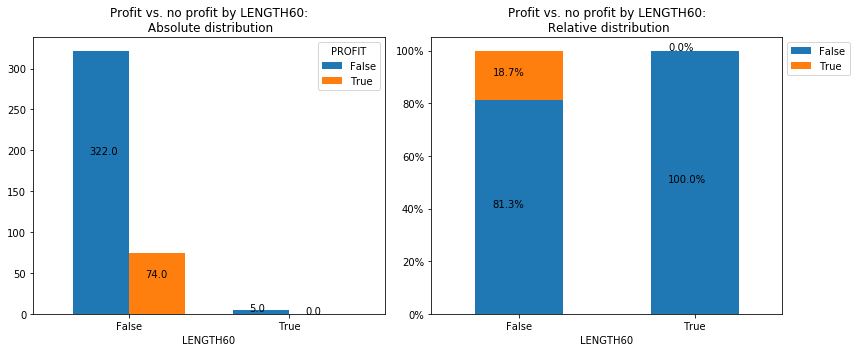

In [16]:
fig = plt.figure(figsize=(12, 5)) #specify figure size

#Absolute distribution
plt.subplot(1, 2, 1)
ax1 = data.groupby(['LENGTH60','PROFIT'])['PROFIT'].count().unstack().plot.bar(rot=0, ax=plt.gca(), width=0.7)
plt.title('Profit vs. no profit by LENGTH60:\n Absolute distribution') 
#plot bar labels
for p in ax1.patches:
    ax1.annotate(str(p.get_height()), (p.get_x() +0.1, p.get_height() * 0.605))

#Relative distribution
plt.subplot(1, 2, 2)
ax2 = data.groupby(['LENGTH60','PROFIT'])['PROFIT'].size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True, rot=0, ax=plt.gca())
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Profit vs. no profit by LENGTH60:\n Relative distribution') 
#plot bar labels
for p, q in zip(ax2.patches[0:2], ax2.patches[2:4]):
    ax2.annotate(str(round(p.get_height(),1)) + '%', (p.get_x()+0.1, p.get_height()/2))
    ax2.annotate(str(round(q.get_height(),1)) + '%', (q.get_x()+0.1, q.get_height()/2+p.get_height()))

plt.tight_layout()
plt.show()

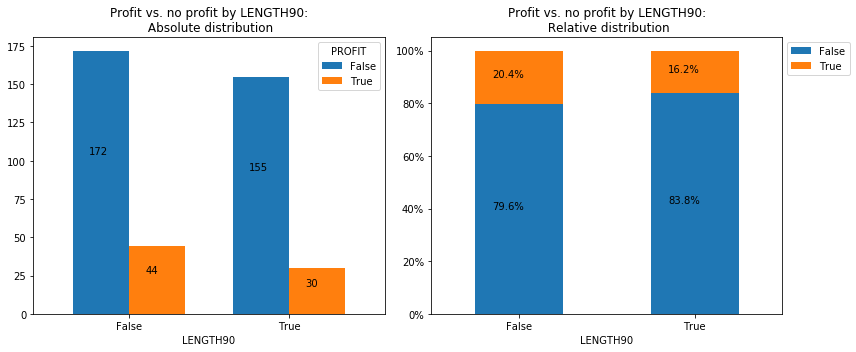

In [17]:
fig = plt.figure(figsize=(12, 5)) #specify figure size

#Absolute distribution
plt.subplot(1, 2, 1)
ax1 = data.groupby(['LENGTH90','PROFIT'])['PROFIT'].count().unstack().plot.bar(rot=0, ax=plt.gca(), width=0.7)
plt.title('Profit vs. no profit by LENGTH90:\n Absolute distribution') 
#plot bar labels
for p in ax1.patches:
    ax1.annotate(str(p.get_height()), (p.get_x() +0.1, p.get_height() * 0.605))

#Relative distribution
plt.subplot(1, 2, 2)
ax2 = data.groupby(['LENGTH90','PROFIT'])['PROFIT'].size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True, rot=0, ax=plt.gca())
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Profit vs. no profit by LENGTH90:\n Relative distribution') 
#plot bar labels
for p, q in zip(ax2.patches[0:2], ax2.patches[2:4]):
    ax2.annotate(str(round(p.get_height(),1)) + '%', (p.get_x()+0.1, p.get_height()/2))
    ax2.annotate(str(round(q.get_height(),1)) + '%', (q.get_x()+0.1, q.get_height()/2+p.get_height()))

plt.tight_layout()
plt.show()

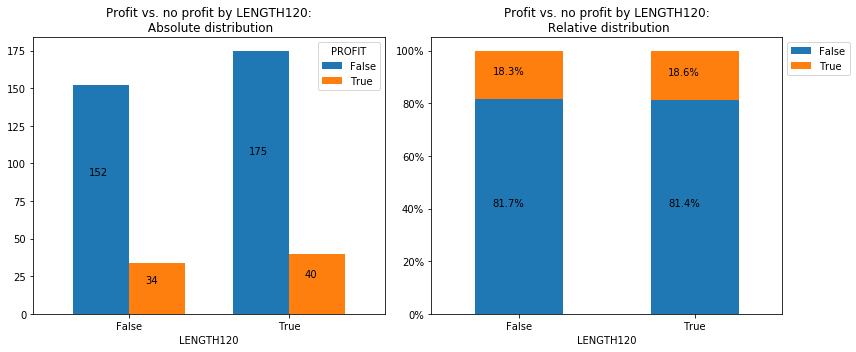

In [18]:
fig = plt.figure(figsize=(12, 5)) #specify figure size

#Absolute distribution
plt.subplot(1, 2, 1)
ax1 = data.groupby(['LENGTH120','PROFIT'])['PROFIT'].count().unstack().plot.bar(rot=0, ax=plt.gca(), width=0.7)
plt.title('Profit vs. no profit by LENGTH120:\n Absolute distribution') 
#plot bar labels
for p in ax1.patches:
    ax1.annotate(str(p.get_height()), (p.get_x() +0.1, p.get_height() * 0.605))

#Relative distribution
plt.subplot(1, 2, 2)
ax2 = data.groupby(['LENGTH120','PROFIT'])['PROFIT'].size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True, rot=0, ax=plt.gca())
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Profit vs. no profit by LENGTH120:\n Relative distribution') 
#plot bar labels
for p, q in zip(ax2.patches[0:2], ax2.patches[2:4]):
    ax2.annotate(str(round(p.get_height(),1)) + '%', (p.get_x()+0.1, p.get_height()/2))
    ax2.annotate(str(round(q.get_height(),1)) + '%', (q.get_x()+0.1, q.get_height()/2+p.get_height()))

plt.tight_layout()
plt.show()

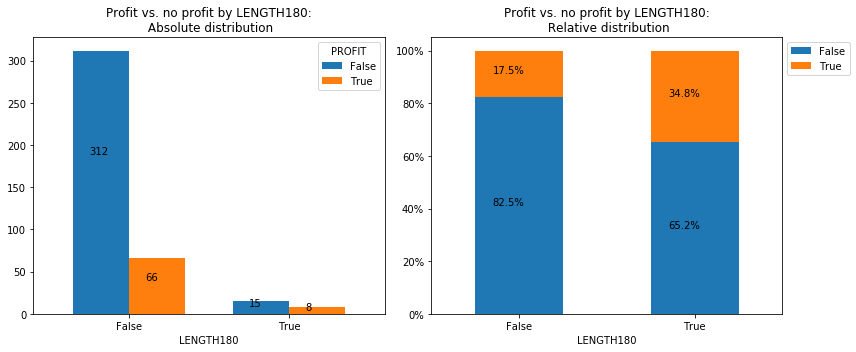

In [19]:
fig = plt.figure(figsize=(12, 5)) #specify figure size

#Absolute distribution
plt.subplot(1, 2, 1)
ax1 = data.groupby(['LENGTH180','PROFIT'])['PROFIT'].count().unstack().plot.bar(rot=0, ax=plt.gca(), width=0.7)
plt.title('Profit vs. no profit by LENGTH180:\n Absolute distribution') 
#plot bar labels
for p in ax1.patches:
    ax1.annotate(str(p.get_height()), (p.get_x() +0.1, p.get_height() * 0.605))

#Relative distribution
plt.subplot(1, 2, 2)
ax2 = data.groupby(['LENGTH180','PROFIT'])['PROFIT'].size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True, rot=0, ax=plt.gca())
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Profit vs. no profit by LENGTH180:\n Relative distribution') 
#plot bar labels
for p, q in zip(ax2.patches[0:2], ax2.patches[2:4]):
    ax2.annotate(str(round(p.get_height(),1)) + '%', (p.get_x()+0.1, p.get_height()/2))
    ax2.annotate(str(round(q.get_height(),1)) + '%', (q.get_x()+0.1, q.get_height()/2+p.get_height()))

plt.tight_layout()
plt.show()

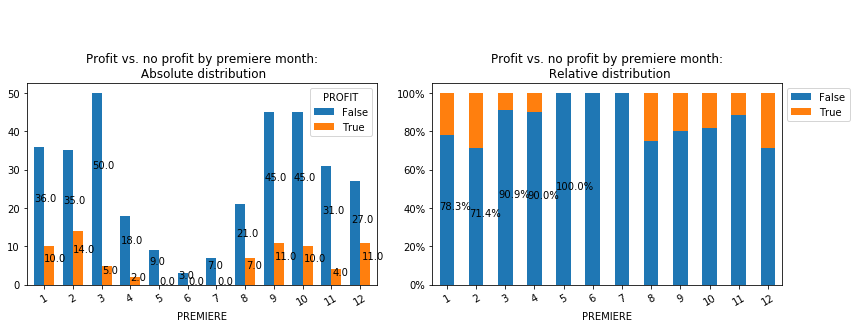

In [20]:
fig = plt.figure(figsize=(12, 5)) #specify figure size

#Absolute distribution
plt.subplot(1, 2, 1)
ax1 = data.groupby(['PREMIERE', 'PROFIT'])['PROFIT'].count().unstack().plot.bar(rot=30, ax=plt.gca(), width=0.7)
plt.title('Profit vs. no profit by premiere month:\n Absolute distribution') 
#plot bar labels
for p in ax1.patches:
    ax1.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 0.605))

#Relative distribution
plt.subplot(1, 2, 2)
ax2 = data.groupby(['PREMIERE', 'PROFIT'])['PROFIT'].size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True, rot=30, ax=plt.gca())
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Profit vs. no profit by premiere month:\n Relative distribution') 
#plot bar labels
for p, q in zip(ax2.patches[0:5], ax2.patches[5:10]):
    ax2.annotate(str(round(p.get_height(),1)) + '%', (p.get_x(), p.get_height()/2))
    ax2.annotate(str(round(q.get_height(),1)) + '%', (q.get_x(), q.get_height()/2+p.get_height()))

plt.tight_layout()
plt.show()

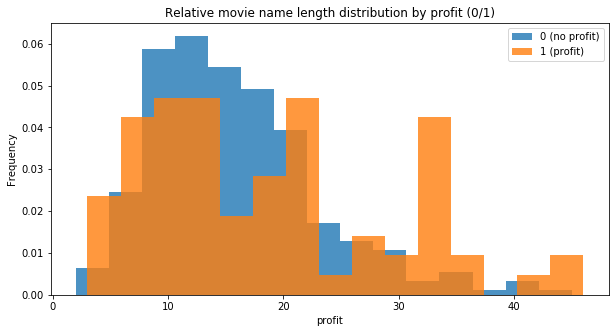

In [21]:
ax = data['NAME_LENGTH'].loc[data['PROFIT'] == 0].plot.hist(bins=15, density = True, alpha=0.8, label='0 (no profit)', figsize = (10,5))
ax = data['NAME_LENGTH'].loc[data['PROFIT'] == 1].plot.hist(bins=15, density = True, alpha=0.8, label='1 (profit)', figsize = (10,5))
ax.set_xlabel('profit')
ax.set_title('Relative movie name length distribution by profit (0/1)')
ax.legend();

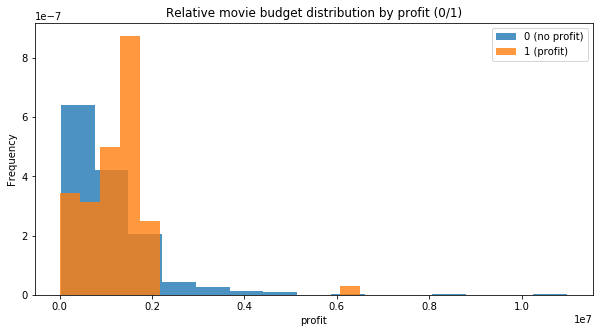

In [22]:
ax = data['BUDGET'].loc[data['PROFIT'] == 0].plot.hist(bins=15, density = True, alpha=0.8, label='0 (no profit)', figsize = (10,5))
ax = data['BUDGET'].loc[data['PROFIT'] == 1].plot.hist(bins=15, density = True, alpha=0.8, label='1 (profit)', figsize = (10,5))
ax.set_xlabel('profit')
ax.set_title('Relative movie budget distribution by profit (0/1)')
ax.legend();

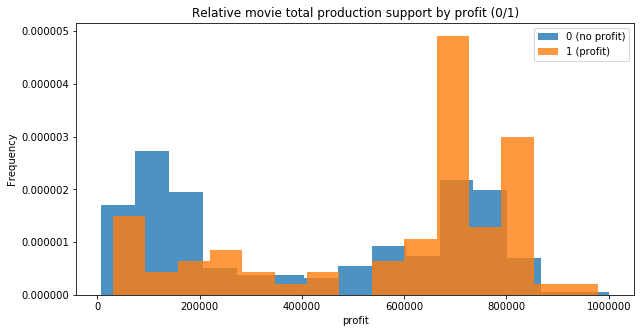

In [23]:
ax = data['TOTAL_SUPPORT'].loc[data['PROFIT'] == 0].plot.hist(bins=15, density = True, alpha=0.8, label='0 (no profit)', figsize = (10,5))
ax = data['TOTAL_SUPPORT'].loc[data['PROFIT'] == 1].plot.hist(bins=15, density = True, alpha=0.8, label='1 (profit)', figsize = (10,5))
ax.set_xlabel('profit')
ax.set_title('Relative movie total production support by profit (0/1)')
ax.legend();

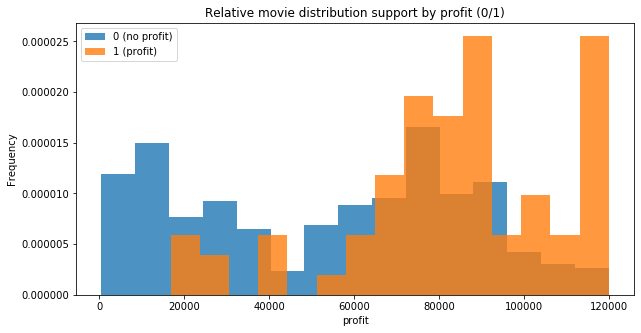

In [24]:
ax = data['DISTRIBUTION_SUPPORT'].loc[data['PROFIT'] == 0].plot.hist(bins=15, density = True, alpha=0.8, label='0 (no profit)', figsize = (10,5))
ax = data['DISTRIBUTION_SUPPORT'].loc[data['PROFIT'] == 1].plot.hist(bins=15, density = True, alpha=0.8, label='1 (profit)', figsize = (10,5))
ax.set_xlabel('profit')
ax.set_title('Relative movie distribution support by profit (0/1)')
ax.legend();

In [25]:
#MORE visaulisations for data1 here

In [26]:
g_data = data['GENRE'].str.get_dummies(sep=', ')
g_data['PROFIT'] = data['PROFIT']
g_data.corr().style

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,PROFIT
Action,1,0.28722,-0.0280884,-0.00962228,0.0101314,0.119643,-0.0362575,-0.101701,-0.0172949,0.0986139,-0.0433245,0.0722001,-0.0551595,-0.0321493,0.269826,-0.0219861,0.375966,-0.00878185,-0.026613,0.191511,-0.0423163,-0.00809177
Adventure,0.28722,1,0.393136,-0.0782518,0.0378359,-0.0463415,-0.138206,-0.209103,0.442294,0.47448,-0.0579877,0.11553,-0.0738283,0.0833809,0.0399549,-0.0548409,0.276228,-0.0117541,-0.0356202,-0.0164386,-0.0566382,-0.025259
Animation,-0.0280884,0.393136,1,-0.0532339,0.0670252,-0.0315256,-0.0940204,-0.172804,0.44427,0.340706,-0.0394484,-0.024232,0.00572002,0.061023,-0.024232,-0.0603591,-0.01797,-0.00799616,-0.024232,-0.0421097,-0.0385304,-0.076077
Biography,-0.00962228,-0.0782518,-0.0532339,1,-0.14923,0.0220917,0.0328697,0.141125,-0.0675959,-0.0350673,0.132625,0.00574428,0.30302,-0.0609301,-0.0504376,-0.0500652,-0.0374036,-0.0166436,0.17429,-0.0876491,-0.0436537,0.120528
Comedy,0.0101314,0.0378359,0.0670252,-0.14923,1,-0.0741259,-0.292035,-0.111241,0.0660171,-0.0465287,-0.14082,-0.0642785,-0.0386377,0.0919823,-0.100788,0.141813,0.16893,-0.0332583,0.0452499,-0.153185,-0.160259,0.185434
Crime,0.119643,-0.0463415,-0.0315256,0.0220917,-0.0741259,1,-0.115894,0.103348,-0.0709605,-0.043964,-0.0486262,-0.0298697,-0.0619094,-0.0360834,0.147578,-0.0744018,-0.0221508,-0.00985648,-0.0298697,0.214947,-0.0474945,0.00785695
Documentary,-0.0362575,-0.138206,-0.0940204,0.0328697,-0.292035,-0.115894,1,-0.42916,-0.157895,-0.131116,-0.0959251,-0.0505469,0.174776,-0.0431579,-0.0890817,-0.152782,-0.0660614,-0.0293955,-0.0120121,-0.154804,-0.0163148,-0.161963
Drama,-0.101701,-0.209103,-0.172804,0.141125,-0.111241,0.103348,-0.42916,1,-0.279076,-0.0997049,0.185257,-0.096181,-0.0593511,-0.0565608,-0.096181,0.122158,-0.121417,0.0462731,0.0726832,-0.000101325,0.11313,-0.0755728
Family,-0.0172949,0.442294,0.44427,-0.0675959,0.0660171,-0.0709605,-0.157895,-0.279076,1,0.361721,-0.0551395,-0.0545435,-0.00354987,0.243397,-0.00171272,-0.112174,-0.0404485,-0.0179984,-0.0545435,-0.0947842,-0.0867274,0.111176
Fantasy,0.0986139,0.47448,0.340706,-0.0350673,-0.0465287,-0.043964,-0.131116,-0.0997049,0.361721,1,-0.0550127,0.124697,-0.0289788,0.158002,0.0454522,-0.0841737,-0.0250601,-0.011151,-0.0337927,-0.0110553,-0.0537325,-0.0455763


In [27]:
# this might be variable in other data set
data['Biography'], data['Comedy'], data['Documentary'], data['Family'] = g_data['Biography'], g_data['Comedy'], g_data['Documentary'], g_data['Family']
data.drop('GENRE', axis=1, inplace=True)
data.head()

,PREMIERE,CO_COUNTRY,BUDGET,TOTAL_SUPPORT,PRODUCTION_SUPPORT,DISTRIBUTION_SUPPORT,NAME_LENGTH,LENGTH60,LENGTH90,LENGTH120,LENGTH180,PROFIT,Biography,Comedy,Documentary,Family
0,10,0,6500000.0,980000.0,940000.0,119300.0,18,False,False,False,True,True,0,0,0,0
1,1,0,1439312.0,700000.0,700000.0,70000.0,11,False,False,False,True,True,1,0,0,0
2,2,0,1390300.0,695115.0,695115.0,100000.0,12,False,True,False,False,True,0,1,0,0
3,9,0,1585428.0,769468.0,769468.0,80900.0,18,False,False,True,False,True,0,1,0,0
4,1,0,1726550.0,708500.0,700000.0,70000.0,5,False,False,False,True,True,1,1,0,0


In [28]:
data = pd.get_dummies(data, columns=['PREMIERE'])
data.head()

,CO_COUNTRY,BUDGET,TOTAL_SUPPORT,PRODUCTION_SUPPORT,DISTRIBUTION_SUPPORT,NAME_LENGTH,LENGTH60,LENGTH90,LENGTH120,LENGTH180,PROFIT,Biography,Comedy,Documentary,Family,PREMIERE_1,PREMIERE_2,PREMIERE_3,PREMIERE_4,PREMIERE_5,PREMIERE_6,PREMIERE_7,PREMIERE_8,PREMIERE_9,PREMIERE_10,PREMIERE_11,PREMIERE_12
0,0,6500000.0,980000.0,940000.0,119300.0,18,False,False,False,True,True,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,1439312.0,700000.0,700000.0,70000.0,11,False,False,False,True,True,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,1390300.0,695115.0,695115.0,100000.0,12,False,True,False,False,True,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,1585428.0,769468.0,769468.0,80900.0,18,False,False,True,False,True,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,1726550.0,708500.0,700000.0,70000.0,5,False,False,False,True,True,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [29]:
X, y = data.loc[:, data.columns !='PROFIT'], data['PROFIT'] #define feature matrix X and labels y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) #split data 70:30

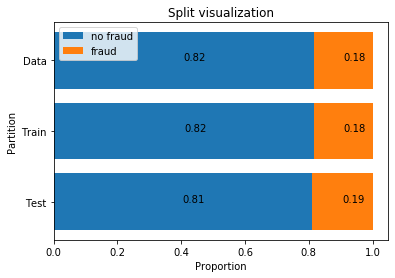

In [30]:
#EXTRA

train_dist = y_train.value_counts() / len(y_train) #normalize absolute count values for plotting
test_dist = y_test.value_counts() / len(y_test)
data_dist = data['PROFIT'].value_counts() / len(data)

fig, ax = plt.subplots()

ax.barh(['Test','Train','Data'], [test_dist[0], train_dist[0], data_dist[0]], color='#1f77b4', label='no profit')
ax.barh(['Test','Train','Data'], [test_dist[1], train_dist[1], data_dist[1]], left=[test_dist[0], train_dist[0], data_dist[0]], color='#ff7f0e', label='profit')
ax.set_title('Split visualization')
ax.legend(loc='upper left')
plt.xlabel('Proportion')
plt.ylabel('Partition')

#plot bar values
for part, a, b in zip(['Test', 'Train','Data'], [test_dist[0], train_dist[0], data_dist[0]], [test_dist[1], train_dist[1], data_dist[1]]):
    plt.text(a/2, part, str(np.round(a, 2)))
    plt.text(b/2+a, part, str(np.round(b, 2)));

In [31]:
#Define Decision tree classifier with some default parameters
clf1 = tree.DecisionTreeClassifier(criterion = "gini",
                               max_depth=3, min_samples_leaf=3)

#Fit the training data 
clf1.fit(X_train, y_train) #what do we need here?

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [32]:
#Use classifier to predict labels
y_pred = clf1.predict(X_test) #what do we need here?

In [33]:
#probabilities
y_pred_probs = clf1.predict_proba(X_test)

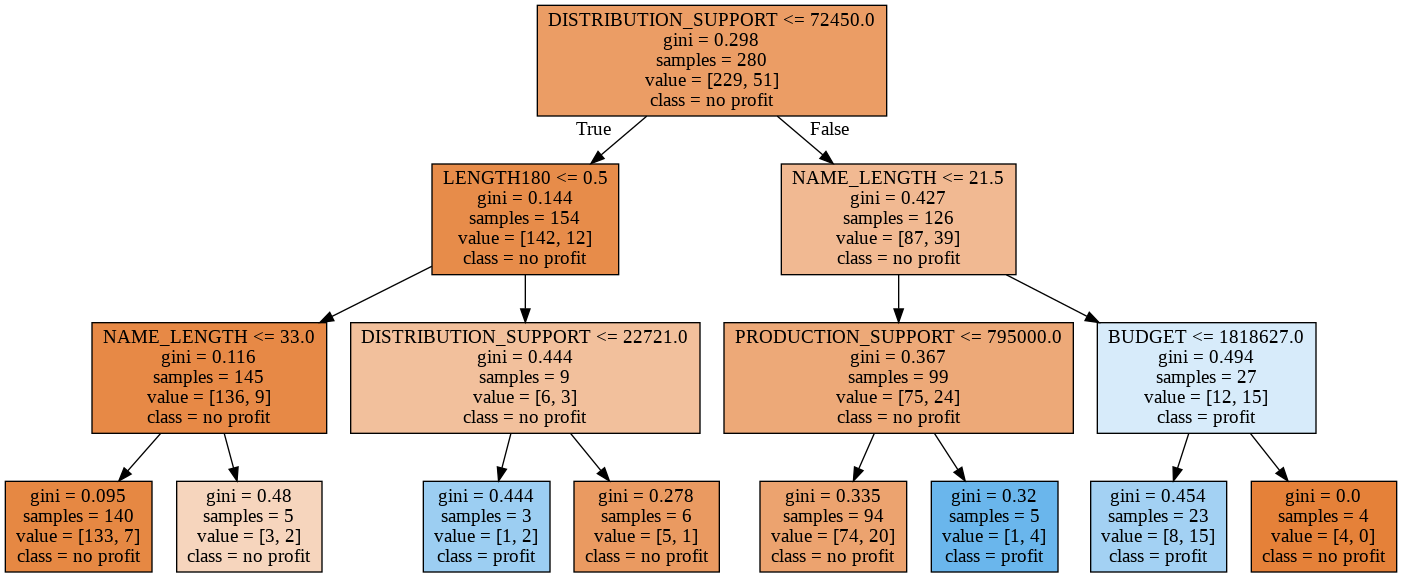

In [34]:
'''
The graphviz library is used to visualize the tree. 
'''

#Decision tree plot
import pydotplus
from IPython.display import Image 

# Create DOT data
dot_data = tree.export_graphviz(clf1, out_file=None, 
                                feature_names=X_train.columns, 
                                class_names=['no profit', 'profit'], filled=True) #or use y_train.unique()

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

# Create PNG 
#graph.write_png("clf1.png") #uncomment this line to save the plot as a .png file

In [35]:
importances = clf1.feature_importances_
indices = np.argsort(importances)[::-1]
feature_order = np.array([X.columns.values])
i = np.argsort(importances)[::-1]
feature_order = feature_order[:,i]

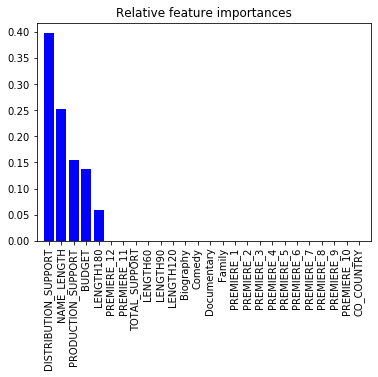

In [36]:
# Print the feature ranking
#print("Feature ranking:")

#for f in range(X.shape[1]):
#    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Relative feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="b",  align="center")
plt.xticks(range(X.shape[1]), feature_order[0], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [37]:
print ("Accuracy is: ", (accuracy_score(y_test,y_pred)*100).round(2))

Accuracy is:  81.82


In [38]:
print(classification_report(y_test, y_pred))  

              precision    recall  f1-score   support

       False       0.86      0.93      0.89        98
        True       0.53      0.35      0.42        23

    accuracy                           0.82       121
   macro avg       0.70      0.64      0.66       121
weighted avg       0.80      0.82      0.80       121



In [39]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
    #    print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylim([1.5, -0.5]) #added to fix a bug that causes the matrix to be squished
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

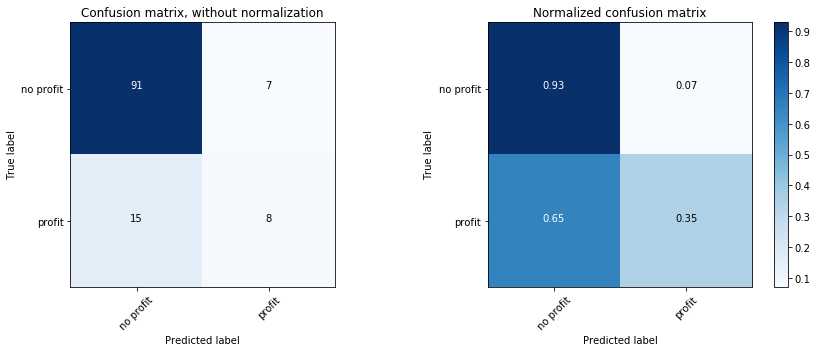

In [40]:
# Compute confusion matrix
class_names = ['no profit', 'profit']
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(13, 5))
plt.subplot(121) 
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.subplot(122) 
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')


plt.show()

In [41]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs[:,1])
roc_auc = auc(fpr, tpr)
print("AUC score on Testing: " + str(roc_auc))

AUC score on Testing: 0.7067435669920142


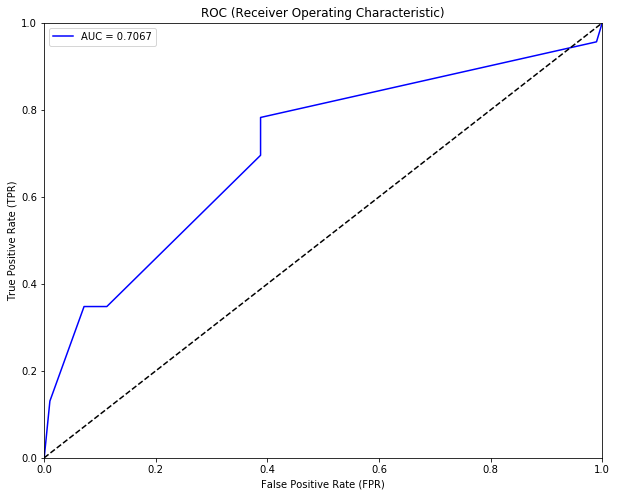

In [42]:
fig, axs = plt.subplots(1,1, figsize=(10,8))

plt.title('ROC (Receiver Operating Characteristic)')
plt.plot(fpr, tpr, 'b', label='AUC = %0.4f'% roc_auc)
plt.legend(loc='best')
plt.plot([0,1],[0,1],color='black', linestyle='--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)');

In [43]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_sample(X_train, y_train) #ONLY APPLIED TO TRAINING!!!

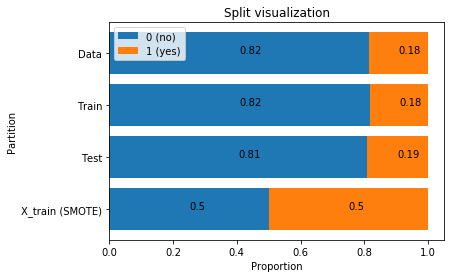

In [44]:
train_dist = y_train.value_counts() / len(y_train) #normalize absolute count values for plotting
test_dist = y_test.value_counts() / len(y_test)
data_dist = y.value_counts() / len(y)
smote_dist = pd.Series(y_sm).value_counts() / len(pd.Series(y_sm))

fig, ax = plt.subplots()

ax.barh(['X_train (SMOTE)','Test','Train','Data'], [smote_dist[0], test_dist[0], train_dist[0], data_dist[0]], color='#1f77b4', label='0 (no)')
ax.barh(['X_train (SMOTE)','Test','Train','Data'], [smote_dist[1], test_dist[1], train_dist[1], data_dist[1]], left=[smote_dist[0], test_dist[0], train_dist[0], data_dist[0]], color='#ff7f0e', label='1 (yes)')
ax.set_title('Split visualization')
ax.legend(loc='upper left')
plt.xlabel('Proportion')
plt.ylabel('Partition')

#plot bar values
for part, a, b in zip(['X_train (SMOTE)', 'Test', 'Train','Data'], [smote_dist[0], test_dist[0], train_dist[0], data_dist[0]], [smote_dist[1], test_dist[1], train_dist[1], data_dist[1]]):
    plt.text(a/2, part, str(np.round(a, 2)))
    plt.text(b/2+a, part, str(np.round(b, 2)));

In [45]:
#Define Decision tree classifier with some default parameters
clf2 = tree.DecisionTreeClassifier(criterion = "gini",
                               max_depth=2, min_samples_leaf=3)

#Fit the training data 
clf2.fit(X_sm, y_sm) #what do we need here?

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [46]:
#Use classifier to predict labels
y_pred2 = clf2.predict(X_test) #what do we need here?

In [47]:
#probabilities
y_pred2_probs = clf2.predict_proba(X_test)

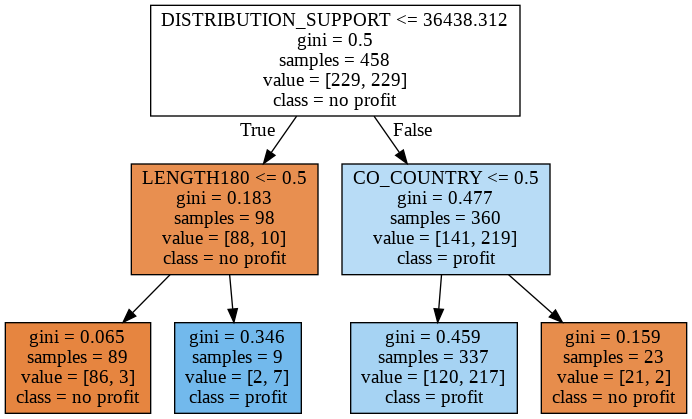

In [48]:
'''
The graphviz library is used to visualize the tree. 
'''

#Decision tree plot
import pydotplus
from IPython.display import Image 

# Create DOT data
dot_data = tree.export_graphviz(clf2, out_file=None, 
                                feature_names=X_sm.columns, 
                                class_names=['no profit', 'profit'], filled=True) #or use y_train.unique()

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

# Create PNG 
#graph.write_png("clf2.png") #uncomment this line to save the plot as a .png file

In [49]:
importances = clf2.feature_importances_
indices = np.argsort(importances)[::-1]
feature_order = np.array([X.columns.values])
i = np.argsort(importances)[::-1]
feature_order = feature_order[:,i]

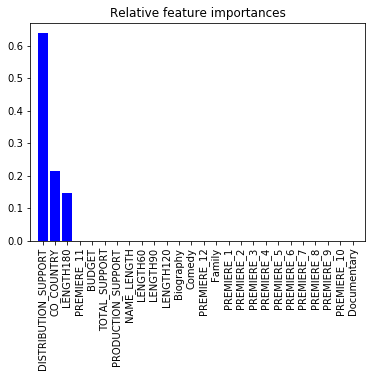

In [50]:
# Print the feature ranking
#print("Feature ranking:")

#for f in range(X.shape[1]):
#    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Relative feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="b",  align="center")
plt.xticks(range(X.shape[1]), feature_order[0], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [51]:
print ("Accuracy is: ", (accuracy_score(y_test,y_pred2)*100).round(2))

Accuracy is:  57.85


In [52]:
print(classification_report(y_test, y_pred2))  

              precision    recall  f1-score   support

       False       0.98      0.49      0.65        98
        True       0.31      0.96      0.46        23

    accuracy                           0.58       121
   macro avg       0.64      0.72      0.56       121
weighted avg       0.85      0.58      0.62       121



In [53]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
    #    print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylim([1.5, -0.5]) #added to fix a bug that causes the matrix to be squished
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

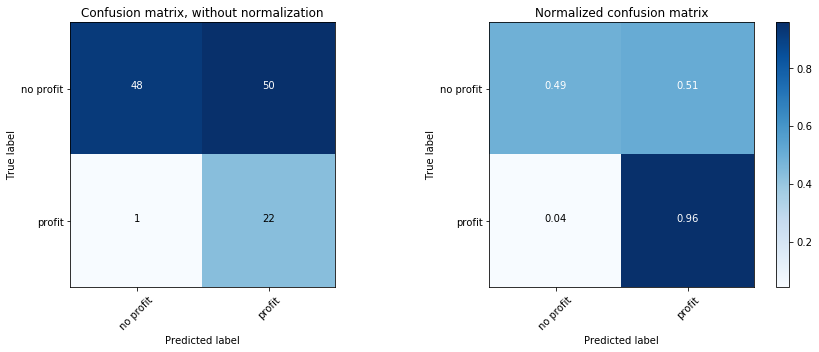

In [54]:
# Compute confusion matrix
class_names = ['no profit', 'profit']
cnf_matrix = confusion_matrix(y_test, y_pred2)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(13, 5))
plt.subplot(121) 
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.subplot(122) 
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')


plt.show()

In [55]:
lr_imb = LogisticRegression(solver='lbfgs').fit(X_train, y_train) #define Logistic Regression classifier

In [56]:
y_pred_lr_imb = lr_imb.predict(X_test)
y_predProba_lr_imb = lr_imb.predict_proba(X_test)
print ("Accuracy is: ", (accuracy_score(y_test, y_pred_lr_imb)*100).round(2))

Accuracy is:  80.99


In [57]:
lr_bal = LogisticRegression(solver='lbfgs').fit(X_sm, y_sm) #define Logistic Regression classifier

In [58]:
y_pred_lr_bal = lr_bal.predict(X_test)
y_predProba_lr_bal = lr_bal.predict_proba(X_test)
print ("Accuracy is: ", (accuracy_score(y_test, y_pred_lr_bal)*100).round(2))

Accuracy is:  54.55


In [59]:
lr_bal

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
svm_bal = SVC(probability=True).fit(X_sm, y_sm)

In [61]:
y_pred_svm_bal = svm_bal.predict(X_test)
y_predProba_svm_bal = svm_bal.predict_proba(X_test)
print ("Accuracy is: ", (accuracy_score(y_test, y_pred_svm_bal)*100).round(2))

Accuracy is:  67.77


In [62]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
    #    print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylim([1.5, -0.5]) #added to fix a bug that causes the matrix to be squished
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

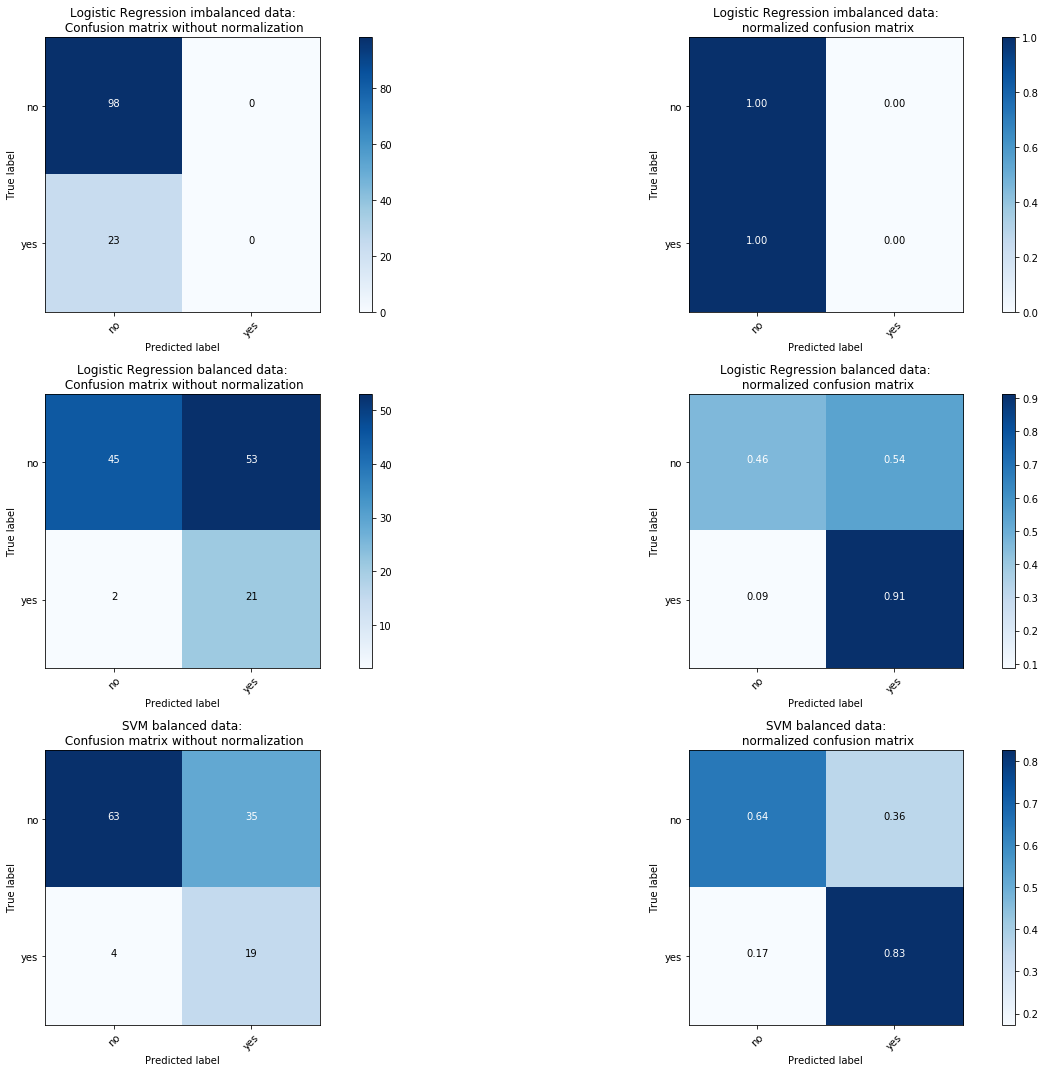

In [63]:
# Compute confusion matrix
class_names = ['no', 'yes']
cnf_matrix_lr_imb = confusion_matrix(y_test, y_pred_lr_imb)
cnf_matrix_lr_bal = confusion_matrix(y_test, y_pred_lr_bal)
cnf_matrix_svm = confusion_matrix(y_test, y_pred_svm_bal)

np.set_printoptions(precision=2)

plt.figure(figsize=(20, 15))

#Plot Logistic Regression (imbalanced) confusion matrix
plt.subplot(321) 
plot_confusion_matrix(cnf_matrix_lr_imb, classes=class_names,
                      title='Logistic Regression imbalanced data:\n Confusion matrix without normalization')

#Plot Logistic Regression (imbalanced) normalized confusion matrix
plt.subplot(322) 
plot_confusion_matrix(cnf_matrix_lr_imb, classes=class_names, normalize=True,
                      title='Logistic Regression imbalanced data:\n normalized confusion matrix')


#Plot Logistic Regression (balanced) confusion matrix
plt.subplot(323) 
plot_confusion_matrix(cnf_matrix_lr_bal, classes=class_names,
                      title='Logistic Regression balanced data:\n Confusion matrix without normalization')

#Plot Logistic Regression (balanced) normalized onfusion matrix
plt.subplot(324) 
plot_confusion_matrix(cnf_matrix_lr_bal, classes=class_names, normalize=True,
                      title='Logistic Regression balanced data:\n normalized confusion matrix')


#Plot SVM balanced confusion matrix
plt.subplot(325) 
plot_confusion_matrix(cnf_matrix_svm, classes=class_names,
                      title='SVM balanced data:\n Confusion matrix without normalization')

#Plot SVM balanced normalized confusion matrix
plt.subplot(326) 
plot_confusion_matrix(cnf_matrix_svm, classes=class_names, normalize=True,
                      title='SVM balanced data:\n normalized confusion matrix')

plt.show()

In [64]:
tree_imb = clf1.fit(X_train, y_train)

y_pred_tree_imb = y_pred
y_predProba_tree_imb = y_pred_probs

In [65]:
tree_bal = clf2.fit(X_train, y_train)

y_pred_tree_bal = y_pred2
y_predProba_tree_bal = y_pred2_probs

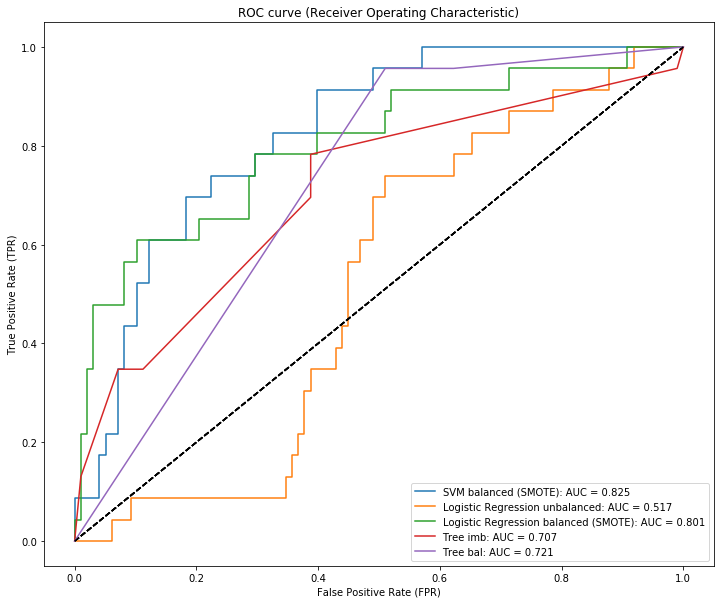

In [66]:
plt.figure(figsize=(12,10))

for test, pred, name in zip([y_test, y_test, y_test, y_test, y_test], [y_predProba_svm_bal[:,1], y_predProba_lr_imb[:,1], y_predProba_lr_bal[:,1], y_predProba_tree_imb[:,1], y_predProba_tree_bal[:,1]], ['SVM balanced (SMOTE)', 'Logistic Regression unbalanced','Logistic Regression balanced (SMOTE)', 'Tree imb', 'Tree bal']):
    fpr, tpr, _ = roc_curve(test, pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='{}: AUC = {}'.format(name, round(roc_auc, 3)))
    plt.legend(loc='best')
    plt.plot([0,1],[0,1],color='black', linestyle='--')

plt.title('ROC curve (Receiver Operating Characteristic)')    
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')

plt.show()